In [1]:
import numpy as np

## Note
**If we add a large number as a boosting reward to the forth element (0.4), the epsilon greedy method outperforms the greedy with a large margin.**

In [2]:
def ten_armed_bandit(lever, k=10):
    mu = [0.2, -0.8, 1.6, 0.4 + 2, 1.2, -1.4, -0.1, -1.1, 0.9, -0.5]
    if lever < k and lever >= 0:
        return np.random.normal(mu[lever], 1)
    else:
        raise Exception(f"Number {lever} out of range")

# Bandit Algorithm:
![Bandit Algorithm - Sutton's book (2018), Page 32](images/Bandit_alg.jpeg)

# Here's how we know Q:

<img src="images/Q_value.jpeg" width="500px" height="1000px">

In [3]:
class Bandit_Agent:
    
    def __init__(self):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = ten_armed_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = ten_armed_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

In [4]:
a_greedy = Bandit_Agent()
a_epsilon = Bandit_Agent()

In [5]:
EPOCHS = 1000
greedy_rewards = np.zeros(EPOCHS)
epsilon_greedy_rewards = np.zeros(EPOCHS)
for i in range(0,EPOCHS):
    greedy_rewards[i] = a_greedy.greedy_update()
    epsilon_greedy_rewards[i] = a_epsilon.epsilon_greedy_update(epsilon=0.1)

In [6]:
a_greedy.obj_print()

[-0.32778803 -3.35555204  1.57717447  0.          0.          0.
  0.          0.          0.          0.        ],avg_reward=1.5703367805154793,best_action=1.5771744695267267


In [7]:
a_epsilon.obj_print()

[ 0.2369184  -1.08190189  1.64387885  2.38343825  1.61114424 -1.2147228
 -0.26333695 -1.5475554   0.08430938 -0.77081982],avg_reward=2.1326083986483813,best_action=2.3834382520893684


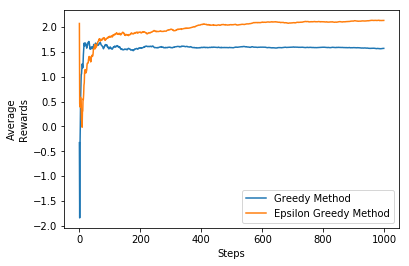

In [9]:
import matplotlib.pyplot as plt

x = np.arange(0, EPOCHS)
greedy_plot, = plt.plot(x,greedy_rewards[x])
epsilog_greedy, = plt.plot(x,epsilon_greedy_rewards[x])
plt.xlabel("Steps")
plt.ylabel("Average\nRewards")
plt.legend([greedy_plot,epsilog_greedy],["Greedy Method", "Epsilon Greedy Method"])
plt.show()